In [30]:
import numpy as np
import pandas as pd

In [31]:
df = pd.read_csv('placement.csv')
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [33]:
df.shape

(100, 4)

In [34]:
df = df.iloc[:,1:]

###  Steps

### 0. Preprocess + EDA + Feature Selection
### 1. Extract input and output cols
### 2. Scale the values
### 3. Train test split
### 4. Train the model
### 5. Evaluate the model/model selection
### 6. Deploy the model

In [35]:
import matplotlib.pyplot as plt

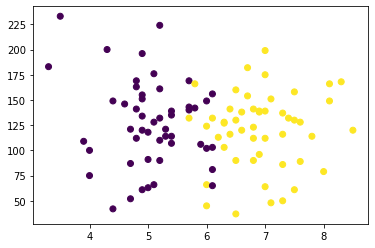

In [36]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [37]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [38]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
clf = LogisticRegression()

In [43]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [44]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

In [45]:
y_test

69    1
24    0
33    0
72    1
40    0
28    0
8     0
64    1
29    1
79    1
Name: placement, dtype: int64

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(y_test,y_pred)

0.8

In [48]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

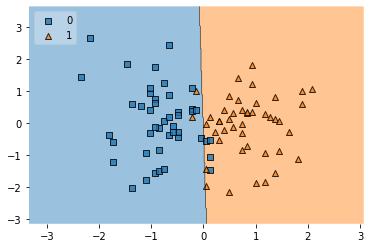

In [49]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)